In [1]:
# Download data from site -- http://ai.stanford.edu/~amaas/data/sentiment/
# p.234
#import pyprind # may need to do >sudo easy_install pip, then >pip install pyprind --user
import pandas as pd
import os
import pyprind

In [2]:
pwd = os.getcwd()
print(pwd+'/aclImdb/')
file = os.listdir(pwd)

/Users/whs/Documents/Data Journalism/Congressional Tweets/whs2k.github.io/aclImdb/


In [3]:
#################
# Start here    #
#################
#import pyprind
import pandas as pd
import os
pwd = os.getcwd()

df = pd.read_csv( 'movie_data.csv', encoding='utf-8')
df.columns = ['review', 'sentiment']

print(df.shape)

(49999, 2)


In [4]:
pwd+'/movie_data.csv'

'/Users/whs/Documents/Data Journalism/Congressional Tweets/whs2k.github.io/movie_data.csv'

In [5]:
df.head(5)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0


In [6]:
# Bag of Word model
# 1. create a vocabulary of unique tokens (or words)
# 2. construct a feature vector for each document, features store count
#    of words per document

import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer() #Instanstiate the count array

docs = np.array(['The sun is shining', 
                 'The weather is sweet',
                 'The sun is shining and the weather is sweet'])

bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())

{'the': 5, 'sun': 3, 'is': 1, 'shining': 2, 'weather': 6, 'sweet': 4, 'and': 0}
[[0 1 1 1 0 1 0]
 [0 1 0 0 1 1 1]
 [1 2 1 1 1 2 1]]


In [7]:
# tf(t,d) - raw term frequencies (t: term, d: nos times term t appears in doc d)
# tf-idf(t,d) - term frequency inverse document frequency
# tf-idf = tf(t,d) * idf(t,x)  = tf(t,d) * log( [1+nd]/[1+df(d,t)] ) 


In [8]:
# TfidTransformer
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer() #Instantiate Term Frequency invers

np.set_printoptions(precision=2)

print(tfidf.fit_transform(count.fit_transform(docs)).toarray()) #How much did the term appear in other documents?


[[ 0.    0.43  0.56  0.56  0.    0.43  0.  ]
 [ 0.    0.43  0.    0.    0.56  0.43  0.56]
 [ 0.4   0.48  0.31  0.31  0.31  0.48  0.31]]


In [9]:
# so if the term "the" shows up lots of times, does that mean it's important?
# how can we make terms that shows up lots of times across documents, less important
# let's normalize by the times these terms show up across documents.

# employ : [nos of docs containing term "the" ]/[total nos of documents]

# if term appear often, give it less emphasis

# tf-idf(t,d) = tf(t,2)*(idf(t,d)+1)
# with idf(t,d) = log ([1+total nos of docs]/[1+nos of docs containing term t])


In [10]:
#Reg functions...to get rid of HTML Tags and emoticons

import re
def preprocessor(text): 
# find '<' then anything not '>' [^>], [^>]* 0 or more prefix, then close with '>'    
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) 
    # eyes[:,;,=], optional nose [-], and mouth[),(,D,P)]
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [11]:
tmp = 'is ;) :) seven.<br /><br />Title (Brazil): Not Available'

print(preprocessor(tmp))
#print(preprocessor('</a>This :) is :( a test :-)!' ))
#print(re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', '</a>This :) is :( a test :-)!'))

is seven title brazil not available;) :)


In [12]:
df['review'] = df['review'].apply(preprocessor) #use the apply method and send in the preprocessor function (applys the function to each row)


In [13]:
df.shape

(49999, 2)

In [14]:
df.tail(3)

,review,sentiment
49996,i don t even know where to begin on this one i...,0
49997,richard tyler is a little boy who is scared of...,0
49998,i waited long to watch this movie also because...,1


In [15]:
# p.242 Processing documents into tokens
# split the sentence/corpora into individual elements
def tokenizer(text):
    return text.split()

In [16]:
tokenizer('running like running and thus they run')

['running', 'like', 'running', 'and', 'thus', 'they', 'run']

In [17]:
# word stemming, tranforming word into their root form
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [18]:
tokenizer_porter('running like running and thus they run')


['run', 'like', 'run', 'and', 'thu', 'they', 'run']

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /Users/whs/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.corpus import stopwords
stop = stopwords.words('english')  # stop words have little meaning eg. a, is, and, has, etc. 
[w for w in tokenizer_porter('a runner likes running and runs a lot') 
 if w not in stop]

['runner', 'like', 'run', 'run', 'lot']

In [21]:
# pg. 244
# Training a Logistic Regression model for document classification
# (X,y)
#X_train = df.loc[:25000, 'review'].values
#y_train = df.loc[:25000, 'sentiment'].values

#X_test  = df.loc[25000:, 'review'].values
#y_test  = df.loc[25000:, 'sentiment'].values

X_train = df.loc[:2500, 'review'].values
y_train = df.loc[:2500, 'sentiment'].values

X_test  = df.loc[2500:5000, 'review'].values
y_test  = df.loc[2500:5000, 'sentiment'].values

print(y_test.shape)

(2501,)


In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidf = TfidfVectorizer(strip_accents = None, 
                       lowercase = False)


In [24]:
param_grid = [
              {'vect__ngram_range':[(1,1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer], #, tokenizer_porter],
               'clf__penalty': ['l1', 'l2'],
               'clf__C': [100]}, # 0.1, 1.0, 10.0, 100.0]},
              
              {'vect__ngram_range': [(1,1)],
               'vect__stop_words': [stop, None],
               'vect__tokenizer': [tokenizer], #, tokenizer_porter],
               'vect__use_idf':[False],
               'vect__norm':[None],
               'clf__penalty': ['l1', 'l2'],
               'clf__C':[100]} #[0.1, 1.0,10.0,100.0]}
                ]


In [25]:
lr_tfidf = Pipeline([ ('vect', tfidf) ,
                      ('clf',  LogisticRegression(random_state=0))])



In [26]:
gs_lr_tfidf = GridSearchCV( lr_tfidf, param_grid, #sends each subset to a different core
                          scoring = 'accuracy',
                          cv = 5, verbose = 1,
                          n_jobs = -1) # n_jobs -1 uses all computer cores

In [27]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2501,) (2501,)
(2501,) (2501,)


In [28]:
#Takes like 60 seconds

gs_lr_tfidf.fit(X_train, y_train) 

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   13.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
 ...nalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid=[{'vect__ngram_range': [(1, 1)], 'vect__stop_words': [['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', '...8>], 'vect__use_idf': [False], 'vect__norm': [None], 'clf__penalty': ['l1', 'l2'], 'clf__C': [100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
    

In [29]:
print('The Best parameter set: %s' % gs_lr_tfidf.best_params_)


The Best parameter set: {'clf__C': 100, 'clf__penalty': 'l2', 'vect__ngram_range': (1, 1), 'vect__stop_words': None, 'vect__tokenizer': <function tokenizer at 0x119f58bf8>}


In [30]:
print('CV Accuracy: %.3f'
     % gs_lr_tfidf.best_score_)
clf = gs_lr_tfidf.best_estimator_
print('Test Accuracy: %.3f' % clf.score(X_test, y_test))


CV Accuracy: 0.855
Test Accuracy: 0.848


In [31]:
df_20170628 = pd.read_json('2017-06-28.json')

# Shiz getting real - Tweet Time

In [32]:
import datetime as dt
from datetime import date, timedelta

#Ceate a vaiarble: todays_tweets = 
#today=dt.datetime.today().strftime("%m/%d/%Y")
today = dt.date.today().strftime("%Y-%m-%d")
yesterday = dt.date.today() - timedelta(1)
yesterday=yesterday.strftime("%Y-%m-%d")

In [33]:
#Ceate a vaiarble: todays_tweets = 
today=dt.datetime.today().strftime("%Y-%m-%d")
yesterday_json=yesterday+'.json'
url='https://alexlitel.github.io/congresstweets/data/'
url_json=url+yesterday_json
#https://alexlitel.github.io/congresstweets/data/2017-07-04.json
print(url_json)

https://alexlitel.github.io/congresstweets/data/2017-07-06.json


In [34]:
#Create Dates / A-axis
from datetime import date
d1 = date(2017, 6, 22)
d0 = date.today()
delta = d0 - d1
periods=delta.days
dates = pd.date_range('20170622', periods=periods)

for date in dates:
    print(date)
print(dates)


2017-06-22 00:00:00
2017-06-23 00:00:00
2017-06-24 00:00:00
2017-06-25 00:00:00
2017-06-26 00:00:00
2017-06-27 00:00:00
2017-06-28 00:00:00
2017-06-29 00:00:00
2017-06-30 00:00:00
2017-07-01 00:00:00
2017-07-02 00:00:00
2017-07-03 00:00:00
2017-07-04 00:00:00
2017-07-05 00:00:00
2017-07-06 00:00:00
DatetimeIndex(['2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
               '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-01', '2017-07-02', '2017-07-03',
               '2017-07-04', '2017-07-05', '2017-07-06'],
              dtype='datetime64[ns]', freq='D')


In [35]:
#Change Dates to string fo manipulation
datesStr=dates.strftime('%Y-%m-%d')

In [36]:
#Cread new pivot dfPlot
dfPlot = pd.DataFrame()
dfPlot['Score']=0
#dfPlot['Date']=dates

In [37]:
import json
import urllib
import urllib.request
data = urllib.request.urlopen(url_json).read()
output = json.loads(data)
dfJson = pd.DataFrame(output)
#print (output)
dfJson.head()

for date in datesStr:
    #dates=dates.strftime("%Y-%m-%d")
    date_json=date+'.json'
    url='https://alexlitel.github.io/congresstweets/data/'
    url_json=url+date_json
    data = urllib.request.urlopen(url_json).read()
    output = json.loads(data)
    dfJson = pd.DataFrame(output)
    predict = np.mean(clf.predict(dfJson['text']))
    #dfPlot=dfPlot.append(predict)
    dfPlot.loc[date]=predict
    #dfPlot[date] = predict#add to dfPlot
    #dfPlot.set_value(1, dfPlot[date], 'date')
    print('sucess'+date)



sucess2017-06-22
sucess2017-06-23
sucess2017-06-24
sucess2017-06-25
sucess2017-06-26
sucess2017-06-27
sucess2017-06-28
sucess2017-06-29
sucess2017-06-30
sucess2017-07-01
sucess2017-07-02
sucess2017-07-03
sucess2017-07-04
sucess2017-07-05
sucess2017-07-06


In [38]:
dfPlot.head()


,Score
2017-06-22,0.492589
2017-06-23,0.497238
2017-06-24,0.591940
2017-06-25,0.482143
2017-06-26,0.471855


In [39]:
#set pictue
#Picture Cedits Alina Oleynik
from IPython.display import Image
smiley=Image("Smiley.png")
frowney=Image("Frowney.png")

if predict > .5:
    facePic = smiley 
else:
    facePic = frowney
    
facePic

import urllib.request
with urllib.request.urlopen('https://github.com/whs2k/whs2k.github.io/blob/master/Frowney.png?raw=true') as url:
    facePic = url.read()
#I'm guessing this would output the html source code?
#print(s)
outfile = open('facePic.png','wb')
outfile.write(facePic)
outfile.close()
#facePic
 

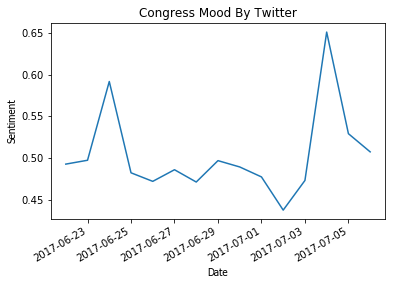

In [49]:
#X-Axis - Days
#max_year=df['fiscal_year'].max()
#min_year=df['fiscal_year'].min()
#years=np.linspace(min_year, max_year, (max_year-min_year+1))

import matplotlib.pyplot as plt
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
thfont = {'fontname':'Tahoma'}


#plt.plot(dates, dfPlot['Score'],'#daccc9', label='Congress Twitterr Sentiment')

#https://matplotlib.org/users/recipes.html

fig, ax = plt.subplots(1)
ax.plot(dates, dfPlot['Score'])
# rotate and align the tick labels so they look better
fig.autofmt_xdate()

# use a more precise date string for the x axis locations in the
# toolbar
import matplotlib.dates as mdates
ax.fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.title('Congress Mood By Twitter')

plt.xlabel('Date',**thfont)
plt.ylabel('Sentiment',**thfont)
plt.show()

plt.savefig('todaysMood2.png')


In [ ]:
#Convert this notebook to a script
#$ ipython nbconvert --to script "IMDB Training Congressional Tweet Analysis.ipynb"
#Then Execute
#$ python "IMDB Training Congressional Tweet Analysis.py"

#Last you need to git
#git add ..
#git commit -m "daily update"
#git push
